<h2 align="center"> Logistic Regression </h2>

### 1: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
data = pd.read_csv('DMV_Written_Tests.csv')
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [0]:
scores = data[['DMV_Test_1','DMV_Test_2']].values
results = data['Results'].values

### 2: Visualize the Data
---

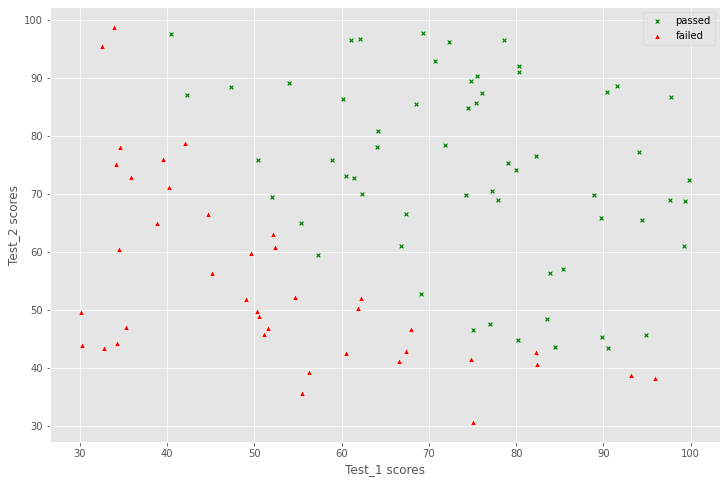

In [7]:
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)

ax = sns.scatterplot(x = scores[passed[:,0],0], y = scores[passed[:,0],1],color = 'green',marker = 'X')
sns.scatterplot(x = scores[failed[:,0],0], y = scores[failed[:,0],1],color = 'red',marker = '^')
ax.set(xlabel = 'Test_1 scores', ylabel = 'Test_2 scores')
ax.legend(['passed','failed'])
plt.show()


### 3: Define the Logistic Sigmoid Function

In [0]:
def logistic_function(x):
  return 1/(1 + np.exp(-x))

In [9]:
logistic_function(4)

0.9820137900379085

### 4: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [0]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

### 5: Cost and Gradient at Initialization
---

In [11]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### 6: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [0]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [0]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [14]:
print("Cost",costs)
print("Theta after gradient",theta)

Cost [0.693147180559946, 0.559403242545655, 0.4805876648533871, 0.43046342235936136, 0.39605647005498307, 0.3709669278894235, 0.35181143821554683, 0.3366625823479169, 0.3243484792498155, 0.31411698799771753, 0.3054632898746155, 0.2980357306412133, 0.29158158307561594, 0.2859143408821499, 0.2808932044202074, 0.2764097679797487, 0.2723791206465763, 0.2687337409240406, 0.2654192108626502, 0.2623911455046634, 0.2596129525785907, 0.2570541709629098, 0.2546892200293839, 0.25249644553195266, 0.2504573827607223, 0.24855618107480806, 0.24677914982076546, 0.2451143966177867, 0.24355153668345655, 0.24208145734126266, 0.24069612578706717, 0.23938843105923613, 0.2381520532694504, 0.23698135472344695, 0.2358712887425202, 0.23481732289271778, 0.23381537401406843, 0.2328617529706419, 0.23195311745280278, 0.23108643148423902, 0.23025893053940155, 0.2294680913776006, 0.2287116058600059, 0.2279873581441674, 0.22729340475420326, 0.22662795710875627, 0.22598936615723075, 0.2253761088308248, 0.2247867760609

### 7: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of cost function after gradient descent')

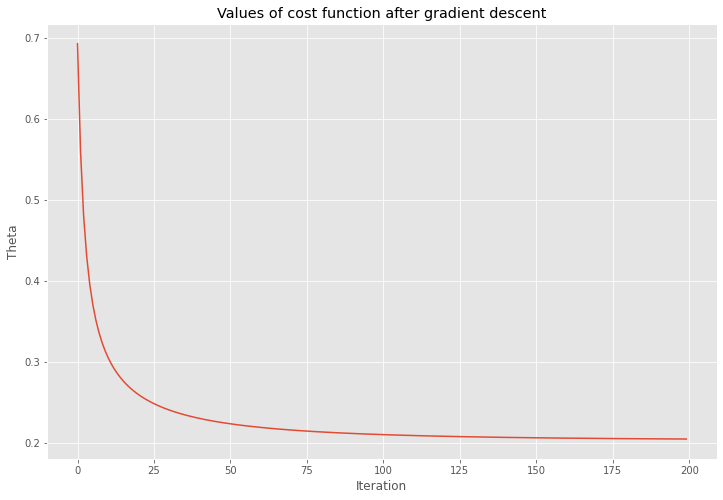

In [15]:
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Theta")
plt.title("Values of cost function after gradient descent")

### 8: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

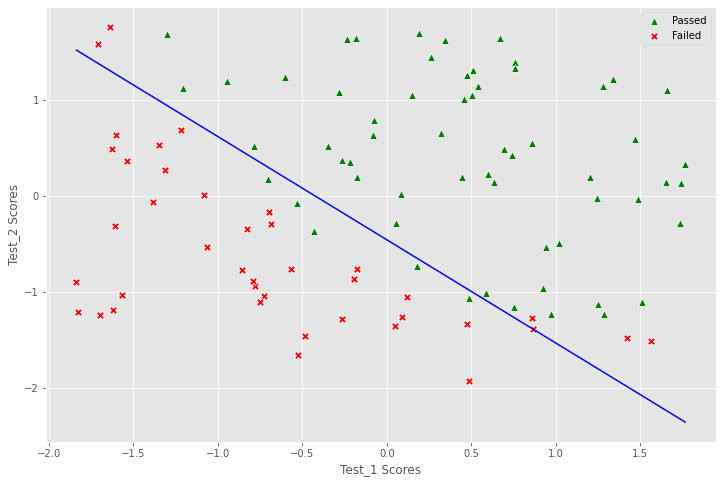

In [16]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="Test_1 Scores", ylabel="Test_2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### 9: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [0]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [23]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [24]:
test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.71 probability of passing.
